In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [1]:
FILE_PATH = "C:/Users/roybo/OneDrive - University College London/PhD/PhD_Prog/007_CNN_Virtual_Contrast/logs/GAN/"

architecture_expts = [f for f in os.listdir(FILE_PATH) if 'D' in f]
hyperparam_expts = [f for f in os.listdir(FILE_PATH) if 'M' in f]

In [26]:
def get_results(expts):
    best_results = {}
    results = {}

    for expt in expts:
        best_results[expt] = {}
        results[expt] = {}

        expt_path = f"{FILE_PATH}{expt}/best_results.json"
        
        with open(expt_path, 'r') as fp:
            data = json.load(fp)
            best_results[expt]["focal"] = data["val_metrics"]["focal"][-1]
            best_results[expt]["global"] = data["val_metrics"]["global"][-1]

        expt_path = f"{FILE_PATH}{expt}/results.json"
        
        with open(expt_path, 'r') as fp:
            data = json.load(fp)
            results[expt]["epochs"] = data["epochs"]
            results[expt]["train_focal"] = data["train_metrics"]["focal"]
            results[expt]["train_global"] = data["train_metrics"]["global"]
            results[expt]["val_focal"] = data["val_metrics"]["focal"]
            results[expt]["val_global"] = data["val_metrics"]["global"]

    return best_results, results

In [27]:
architecture_best, architecture_results = get_results(architecture_expts)
hyperparam_best, hyperparam_results = get_results(hyperparam_expts)

In [28]:
architecture_best

{'D1_G7': {'focal': 0.05533213913440704, 'global': 0.04998907074332237},
 'D1_G9': {'focal': 0.05315069854259491, 'global': 0.04803381860256195},
 'D4_G7': {'focal': 0.05129797384142876, 'global': 0.06731162220239639},
 'D4_G9': {'focal': 0.050049230456352234, 'global': 0.06474149227142334},
 'D7_G7': {'focal': 0.05634307861328125, 'global': 0.048972755670547485},
 'D7_G9': {'focal': 0.05577908456325531, 'global': 0.043782059103250504}}

In [29]:
hyperparam_best

{'L100_M0.0': {'focal': 0.05116388201713562, 'global': 0.046836744993925095},
 'L100_M0.5': {'focal': 0.04736373946070671, 'global': 0.051277339458465576},
 'L100_M1.0': {'focal': 0.043470192700624466, 'global': 0.048473939299583435},
 'L10_M0.0': {'focal': 0.05082930251955986, 'global': 0.05026127025485039},
 'L10_M0.5': {'focal': 0.04967136308550835, 'global': 0.04927157238125801},
 'L10_M1.0': {'focal': 0.04741351306438446, 'global': 0.05189807713031769}}

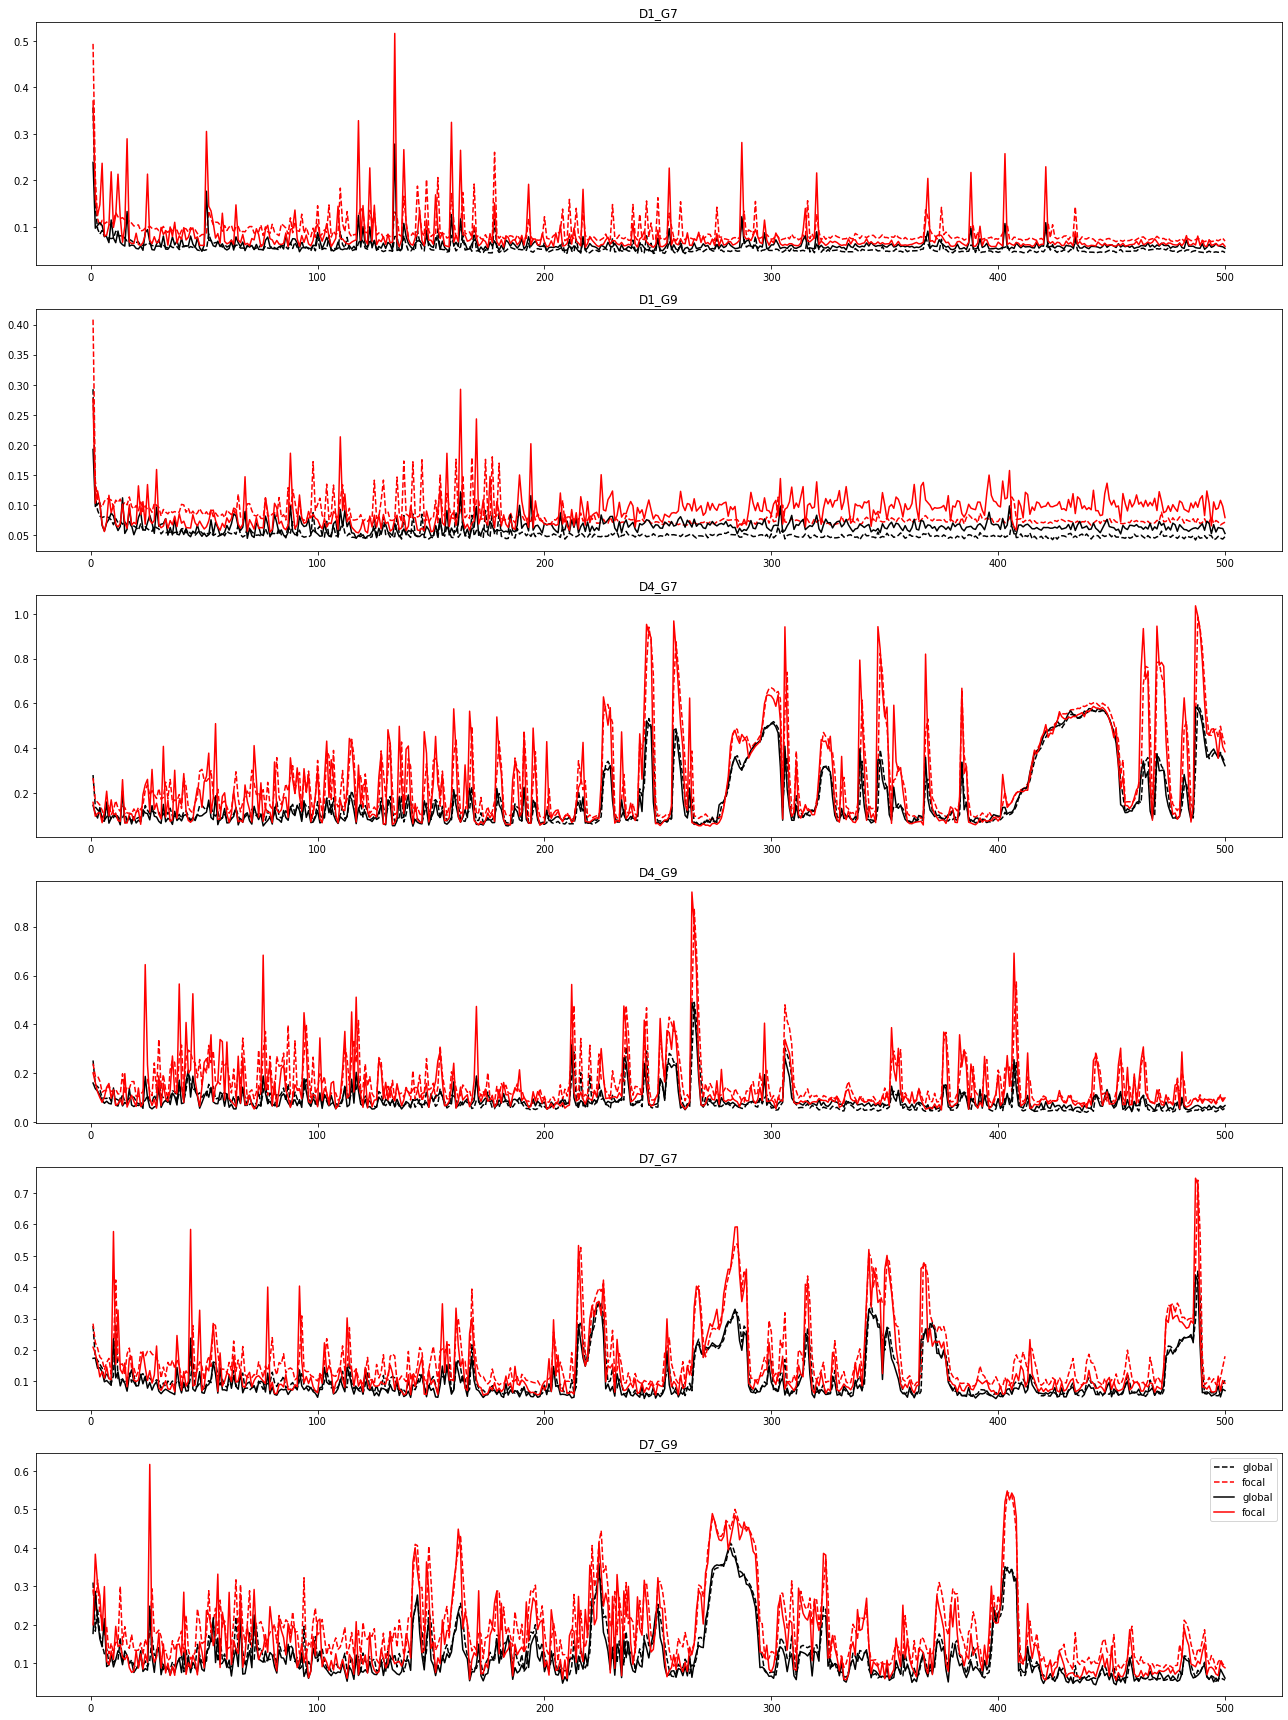

In [33]:
fig, axs = plt.subplots(6, 1, figsize=(18, 24))

for idx, (key, value) in enumerate(architecture_results.items()):
    axs[idx].plot(value["epochs"], value["train_global"], "k--", label="global")
    axs[idx].plot(value["epochs"], value["train_focal"], "r--", label="focal")
    axs[idx].plot(value["epochs"], value["val_global"], "k-", label="global")
    axs[idx].plot(value["epochs"], value["val_focal"], "r-", label="focal")
    axs[idx].set_title(key)

plt.tight_layout()
plt.legend()
plt.show()

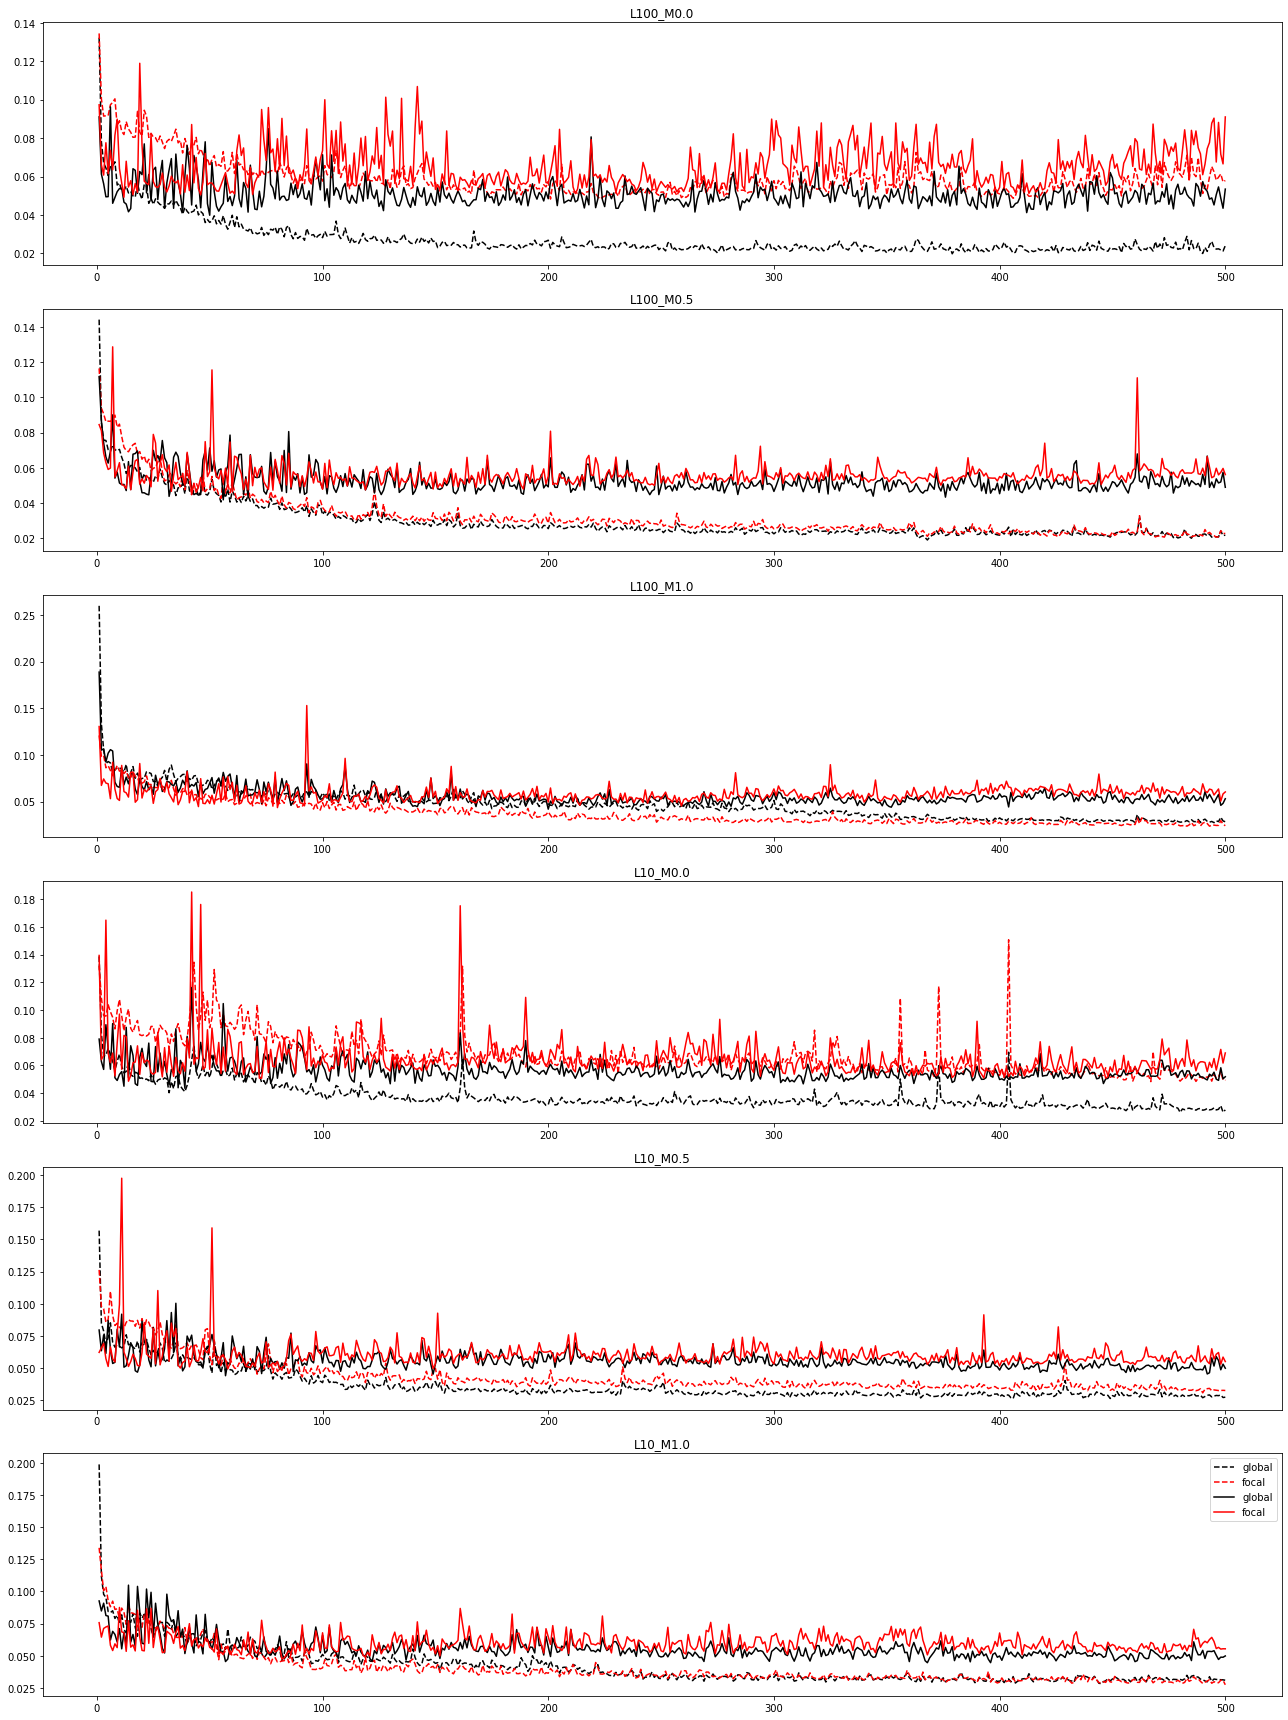

In [34]:
fig, axs = plt.subplots(6, 1, figsize=(18, 24))

for idx, (key, value) in enumerate(hyperparam_results.items()):
    axs[idx].plot(value["epochs"], value["train_global"], "k--", label="global")
    axs[idx].plot(value["epochs"], value["train_focal"], "r--", label="focal")
    axs[idx].plot(value["epochs"], value["val_global"], "k-", label="global")
    axs[idx].plot(value["epochs"], value["val_focal"], "r-", label="focal")
    axs[idx].set_title(key)

plt.tight_layout()
plt.legend()
plt.show()

In [39]:
{key: [val["train_global"][-1], val["train_focal"][-1]] for key, val in hyperparam_results.items()}

{'L100_M0.0': [0.024069568142294884, 0.05793663486838341],
 'L100_M0.5': [0.021891865879297256, 0.022848986089229584],
 'L100_M1.0': [0.02828897163271904, 0.02404649369418621],
 'L10_M0.0': [0.027865614742040634, 0.04935178905725479],
 'L10_M0.5': [0.02748226188123226, 0.03267522156238556],
 'L10_M1.0': [0.03092079795897007, 0.027383603155612946]}

In [40]:
{key: [val["val_global"][-1], val["val_focal"][-1]] for key, val in hyperparam_results.items()}

{'L100_M0.0': [0.05348674952983856, 0.0910186842083931],
 'L100_M0.5': [0.04901896044611931, 0.056211452931165695],
 'L100_M1.0': [0.052976761013269424, 0.060251384973526],
 'L10_M0.0': [0.051825668662786484, 0.06900192052125931],
 'L10_M0.5': [0.04995064064860344, 0.055132389068603516],
 'L10_M1.0': [0.04982433095574379, 0.055378083139657974]}